<a href="https://colab.research.google.com/github/yunhwa02/GASPAL/blob/main/9_23~9_24__%EB%8D%B0%EC%9D%B4%ED%84%B0_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 가스 상승 원인
 - 일본: 에너지에 대한 수입 의존도 높음
 - 원인
  - 1) 국제 에너지 가격의 급격한 상승: 코로나19, 러시아-우크라이나 전쟁으로 인한 에너지 가격 상승  http://www.keaj.kr/news/articleView.html?idxno=4979
  - 2) 2023년 6월 엔저현상: 엔저현상으로 인한 발전연료 구입비 상승
  *엔저현상이란? 엔화의 상대적 가치가 낮아지는 것(23년 6월 100엔당 800원대 기록)

- 가스팔의 요금개정주기: 1월, 4월, 7월, 10월 (대부분의 데이터 갱신 주기가 3개월)
- G10m3가 상승할 때
 - 22년 6월 -> 7월(8745 -> 9075)
 - 22년 9월 -> 10월(9075 -> 9405)
 - 23년 12월 -> 1월(9405 -> 9515)

- G10m3가 감소할 때
 - 23년 10월(9515 -> 9525)

- 22년도 7월: 일본 대규모 가스회사인 도쿄가스, 도호가스, 오사카가스 모두 7월 가격요금을 인상시킨다고 보도함
https://www.e-platform.net/news/articleView.html?idxno=73336
- 일본은 1m3당 종량요금의 단위요금(단가)를 기준평균원료가격와 평균원료가격(3~5개월 전 LNG 및 LPG 평균수입가격)의 차이에 의해 결정함

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


종량요금 = 가스 사용량 * (단위요금(1m3당 단가 ± 원료조정제도에 의거한
조정금액))

*종량요금
- 고쿠라 판매소의 종량 요금
- GP 요금이력 내 10m3 요금(세금포함)
- GP요금이력서에 제공되는 10m3 단위로 부과되는 요금
- 10m3 가스 사용량에 대한 비용이자 타겟 변수



조정금액 = G10m3 / Average_Use + G10m3 / 10

조정금액 = (1 / Average_Use + 1 / 10) * G10m3

In [ ]:
import pandas as pd

gas = pd.read_csv('/content/gaspal(전처리 후 데이터).csv')
gas['G1m3'] = gas['G10m3'] / 10
gas['종량 요금 / 가스 사용량'] = gas['G10m3'] / gas['Average_Use']
gas['조정금액'] = (gas['종량 요금 / 가스 사용량'] - gas['G1m3']) * -1
gas

# Average_Use: 일정하게 15씩 증가

,yymm,G_basic_price,G10m3,G_area_price,JC_10m3,JC_rental_price,WTI,TTS,CP,CPI_GAS,...,House_survey_PG,ENEOSグローブエナジー,エコア,GASGASエネルギー,イワタニ九州,明治産業（明治ガス）,Average_Use,G1m3,종량 요금 / 가스 사용량,조정금액
0,2016-01-01,1980.0,8650.0,7352.0,7732.0,7964.0,31.54,119.34,345.0,100.5,...,2010.0,NaN,NaN,NaN,NaN,NaN,1160.0,865.0,7.456897,857.543103
1,2016-02-01,1980.0,8650.0,7352.0,7712.0,7943.0,30.39,116.08,285.0,100.3,...,2242.0,NaN,NaN,NaN,NaN,NaN,1175.0,865.0,7.361702,857.638298
2,2016-03-01,1980.0,8650.0,7352.0,7712.0,7943.0,37.77,114.03,290.0,99.5,...,2235.0,NaN,NaN,NaN,NaN,NaN,1190.0,865.0,7.268908,857.731092
3,2016-04-01,1980.0,8650.0,7352.0,7524.0,7750.0,40.96,110.83,320.0,98.2,...,2171.0,NaN,NaN,NaN,NaN,NaN,1205.0,865.0,7.178423,857.821577
4,2016-05-01,1980.0,8650.0,7352.0,7524.0,7750.0,46.73,110.12,325.0,97.2,...,1984.0,NaN,NaN,NaN,NaN,NaN,1220.0,865.0,7.090164,857.909836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2024-03-01,2090.0,9295.0,9459.0,8813.0,9077.0,80.49,150.67,630.0,114.0,...,2112.0,9273.0,9592.0,9053.0,10450.0,9257.0,2630.0,929.5,3.534221,925.965779
99,2024-04-01,2090.0,9295.0,9506.0,8866.0,9132.0,84.59,154.51,615.0,115.1,...,2081.0,9460.0,9548.0,9240.0,10450.0,9308.0,2645.0,929.5,3.514178,925.985822
100,2024-05-01,2090.0,9295.0,9506.0,8866.0,9132.0,78.81,157.25,580.0,115.4,...,1914.0,9460.0,9548.0,9240.0,10450.0,9308.0,2660.0,929.5,3.494361,926.005639
101,2024-06-01,2090.0,9295.0,9506.0,8894.0,9161.0,78.89,158.89,580.0,118.3,...,1597.0,9394.0,9548.0,9240.0,10450.0,9308.0,2675.0,929.5,3.474766,926.025234


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


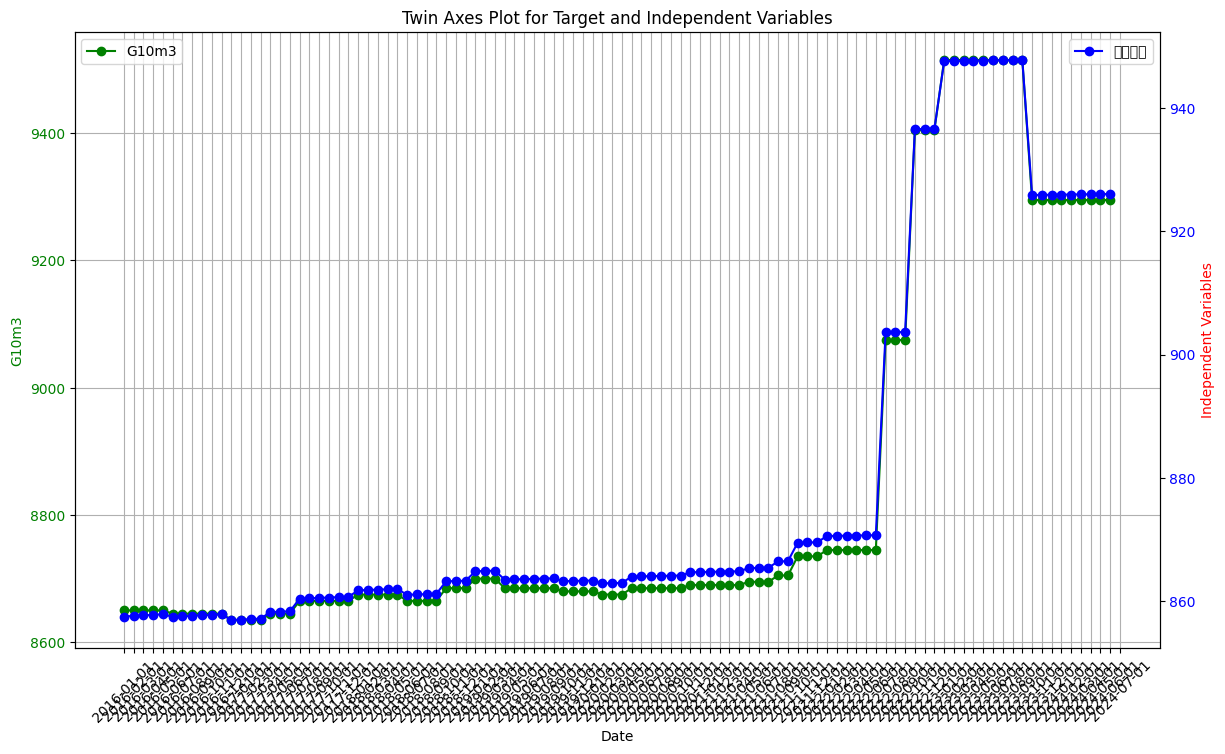

In [ ]:
import matplotlib.pyplot as plt

df = gas.copy()

def plot_with_twin_axes(df, features, target):
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # 종속변수 시각화
    ax1.plot(df['yymm'], df[target], marker='o', color='g', label=target)
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'{target}', color='g')
    ax1.tick_params(axis='y', labelcolor='g')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True)

    # 트윈 축 생성 및 독립변수 시각화
    ax2 = ax1.twinx()
    for feature in features:
        ax2.plot(df['yymm'].index, df[feature], marker='o', linestyle='-', color='b', label=feature)

    ax2.set_ylabel('Independent Variables', color='r')
    ax2.tick_params(axis='y', labelcolor='b')

    # 범례 및 제목 추가
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title('Twin Axes Plot for Target and Independent Variables')
    plt.show()

features = ['조정금액']
plot_with_twin_axes(df, features, 'G10m3')


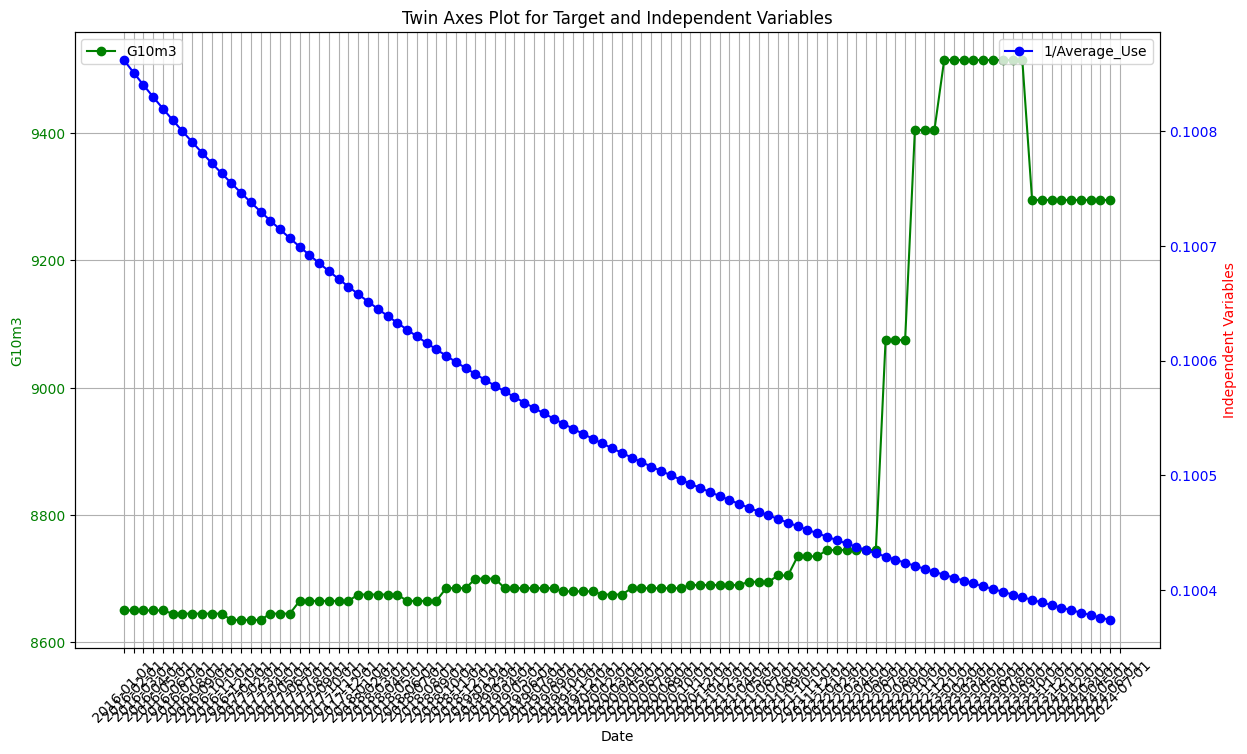

In [ ]:
gas['1/Average_Use'] = 1 / gas['Average_Use'] + 1/10
gas

df = gas.copy()

def plot_with_twin_axes(df, features, target):
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # 종속변수 시각화
    ax1.plot(df['yymm'], df[target], marker='o', color='g', label=target)
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'{target}', color='g')
    ax1.tick_params(axis='y', labelcolor='g')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True)

    # 트윈 축 생성 및 독립변수 시각화
    ax2 = ax1.twinx()
    for feature in features:
        ax2.plot(df['yymm'].index, df[feature], marker='o', linestyle='-', color='b', label=feature)

    ax2.set_ylabel('Independent Variables', color='r')
    ax2.tick_params(axis='y', labelcolor='b')

    # 범례 및 제목 추가
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title('Twin Axes Plot for Target and Independent Variables')
    plt.show()

features = ['1/Average_Use']
plot_with_twin_axes(df, features, 'G10m3')


### 엔저 현상에 따른 가스 요금 변화 확인

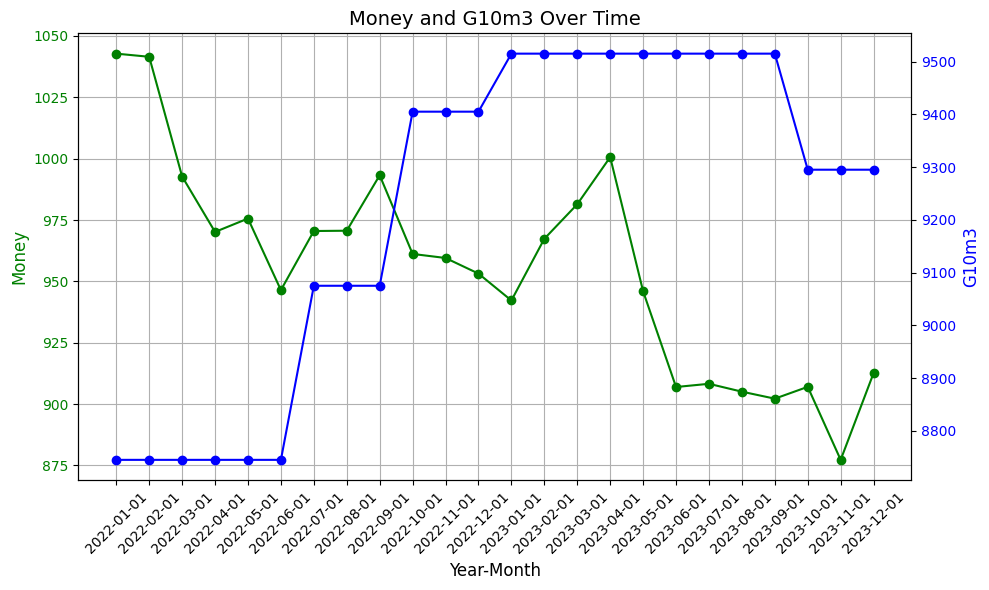

In [ ]:
import pandas as pd

gas = pd.read_csv('/content/gaspal(전처리 후 데이터).csv')
gas = gas[(gas["yymm"] >= '2022-01-01') & (gas['yymm'] < '2024-01-01')]
gas = gas[['yymm', 'G10m3']]


df_22 = pd.read_csv('/content/중소기업은행_환율변동 정보_20221231.csv', encoding='cp949')
df_23 = pd.read_csv('/content/중소기업은행_환율변동 정보_20231231.csv', encoding='cp949')
df_22 = df_22[df_22['통화'] == 'JPY'].reset_index(drop=False)
df_23 = df_23[df_23['통화'] == 'JPY'].reset_index(drop=False)

df_22 = df_22.iloc[:, 1:].T
df_23 = df_23.iloc[:, 1:].T

money = pd.concat([df_22, df_23])
money = money[money[0] != "JPY"]

# 시각화
import matplotlib.pyplot as plt

# 첫 번째 그래프: money[0]의 데이터를 기본 축에 표시
fig, ax1 = plt.subplots(figsize=(10,6))

# money[0] 시각화 (첫 번째 축)
ax1.plot(gas['yymm'], money[0], marker='o', color='g', label='Money')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Money', color='g', fontsize=12)
ax1.tick_params(axis='y', labelcolor='g')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# 두 번째 축을 생성 (트윈 축 사용)
ax2 = ax1.twinx()

# 두 번째 그래프: G10m3 시각화 (두 번째 축)
ax2.plot(gas['yymm'], gas['G10m3'], marker='o', linestyle='-', color='b', label='G10m3')
ax2.set_ylabel('G10m3', color='b', fontsize=12)
ax2.tick_params(axis='y', labelcolor='b')

# 타이틀 설정
plt.title('Money and G10m3 Over Time', fontsize=14)

# 레이아웃 조정
fig.tight_layout()

# 그래프 표시
plt.show()


In [ ]:
money = money.copy()
money = money.reset_index(drop=False)
money['group'] = (money.index // 3)

# 그룹별 평균 계산 후, 동일 그룹 내 모든 행을 같은 평균 값으로 대체
money[0] = money.groupby('group')[0].transform('mean')

# 결과 확인
money.drop(columns='group')  # 그룹 컬럼은 제거하고 출력

,index,0
0,2022-01-31,1025.686667
1,2022-02-28,1025.686667
2,2022-03-31,1025.686667
3,2022-04-29,964.073333
4,2022-05-31,964.073333
5,2022-06-30,964.073333
6,2022-07-29,978.143333
7,2022-08-31,978.143333
8,2022-09-30,978.143333
9,2022-10-31,957.97


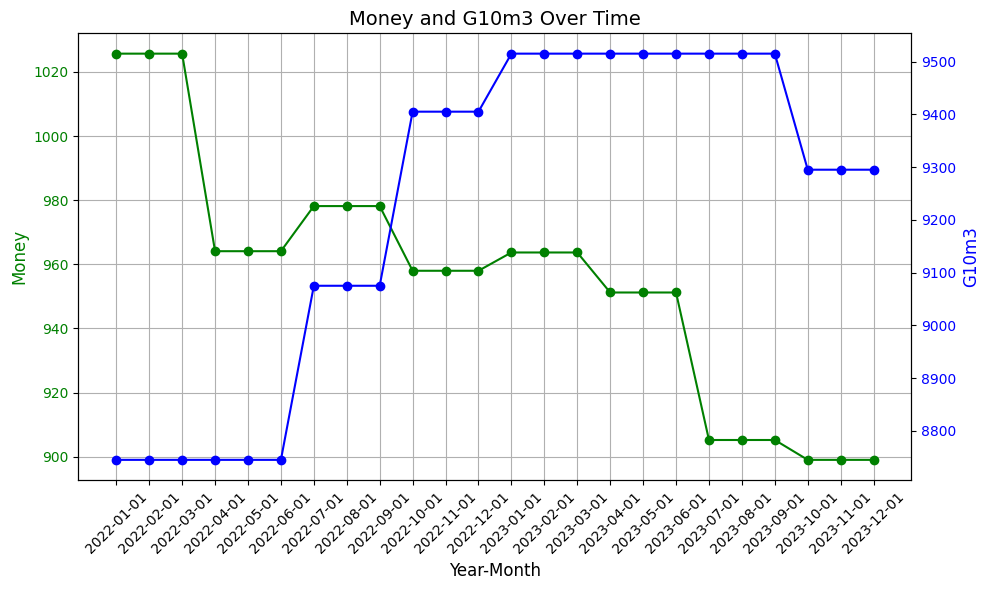

In [ ]:
# 3개월씩 평균내서 시각화
import pandas as pd

gas = pd.read_csv('/content/gaspal(전처리 후 데이터).csv')
gas = gas[(gas["yymm"] >= '2022-01-01') & (gas['yymm'] < '2024-01-01')]
gas = gas[['yymm', 'G10m3']]

# 시각화
import matplotlib.pyplot as plt

# 첫 번째 그래프: money[0]의 데이터를 기본 축에 표시
fig, ax1 = plt.subplots(figsize=(10,6))

# money[0] 시각화 (첫 번째 축)
ax1.plot(gas['yymm'], money[0], marker='o', color='g', label='Money')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Money', color='g', fontsize=12)
ax1.tick_params(axis='y', labelcolor='g')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# 두 번째 축을 생성 (트윈 축 사용)
ax2 = ax1.twinx()

# 두 번째 그래프: G10m3 시각화 (두 번째 축)
ax2.plot(gas['yymm'], gas['G10m3'], marker='o', linestyle='-', color='b', label='G10m3')
ax2.set_ylabel('G10m3', color='b', fontsize=12)
ax2.tick_params(axis='y', labelcolor='b')

# 타이틀 설정
plt.title('Money and G10m3 Over Time', fontsize=14)

# 레이아웃 조정
fig.tight_layout()

# 그래프 표시
plt.show()

# 월마다 시각화 했을 경우 잘 보이지 않아 3개월 단위로 평균 내서 시각화(G10m3의 개정주기가 3개월 단위)
# 22년 4~6월 엔화 1000원대에서 900원대로 하락 -> 이후 G10m3의 가격 6월에 상승
# 엔화의 영향이 크지는 않아 보이나 약간은 상관성 있어 보임

### LNG 수입가격에 따른 가스 요금 변화 확인

가스팔의 요금개정주기: 1월, 4월, 7월, 10월 (대부분의 데이터 갱신 주기가 3개월)

G10m3가 상승할 때

22년 6월 -> 7월(8745 -> 9075)
22년 9월 -> 10월(9075 -> 9405)
23년 12월 -> 1월(9405 -> 9515)
G10m3가 감소할 때

23년 10월(9515 -> 9525)

https://www.keei.re.kr/board.es?mid=a10103020000&bid=0014&list_no=88207&act=view
- 데이터 22년 1월부터 23년 6월까지만 존재

- 3개월 평균으로 확인했을 때, LNG 가격이 대폭 증가했을 때, 가스팔의 요금도 상승한 것을 볼 수 있음

*LNG도입가 = 유가연동지수*원유가격*환율+기타 상수(수송비, 보험료 등) (*환율XCP가 LNG와 추세 비슷한지 확인해 보았으나 별로 유사하지 않음)

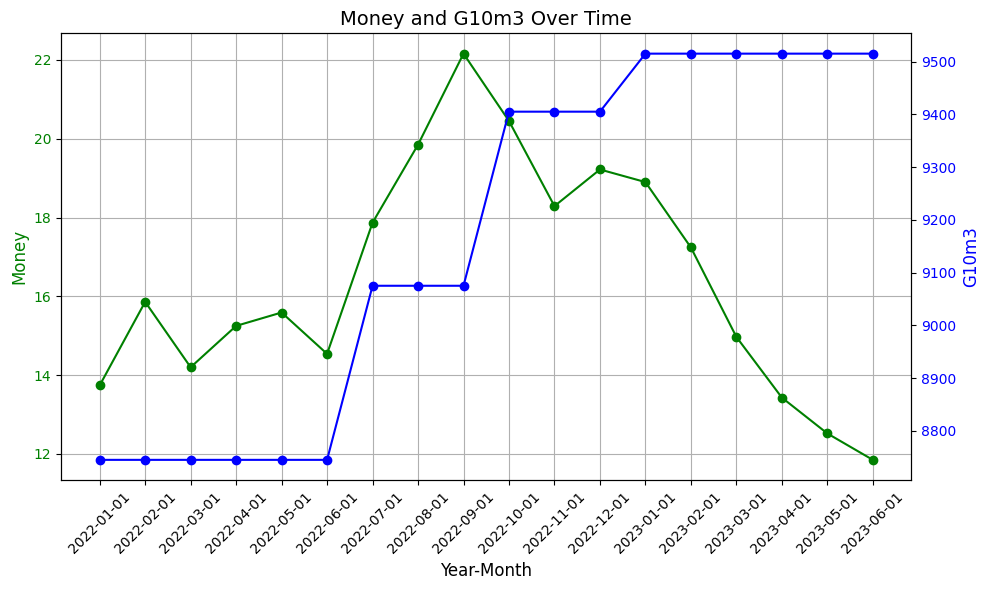

In [ ]:
import pandas as pd

gas = pd.read_csv('/content/gaspal(전처리 후 데이터).csv')
gas = gas[(gas["yymm"] >= '2022-01-01') & (gas['yymm'] < '2023-07-01')]
gas = gas[['yymm', 'G10m3']]

lng = pd.read_csv('/content/한국가스공사_아시아국 LNG 수입단가_20230630.csv', encoding='cp949')
lng = lng[['연월일', '일본물량(Ton)', '일본수입대금(1000달러)', '일본단위가격(MMBtu당달러)']]

# 시각화
import matplotlib.pyplot as plt

# 첫 번째 그래프: money[0]의 데이터를 기본 축에 표시
fig, ax1 = plt.subplots(figsize=(10,6))

# money[0] 시각화 (첫 번째 축)
ax1.plot(gas['yymm'], lng['일본단위가격(MMBtu당달러)'], marker='o', color='g', label='Money')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Money', color='g', fontsize=12)
ax1.tick_params(axis='y', labelcolor='g')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# 두 번째 축을 생성 (트윈 축 사용)
ax2 = ax1.twinx()

# 두 번째 그래프: G10m3 시각화 (두 번째 축)
ax2.plot(gas['yymm'], gas['G10m3'], marker='o', linestyle='-', color='b', label='G10m3')
ax2.set_ylabel('G10m3', color='b', fontsize=12)
ax2.tick_params(axis='y', labelcolor='b')

# 타이틀 설정
plt.title('Money and G10m3 Over Time', fontsize=14)

# 레이아웃 조정
fig.tight_layout()

# 그래프 표시
plt.show()


In [ ]:
lng = lng.copy()
lng['group'] = (lng.index // 3)

# 그룹별 평균 계산 후, 동일 그룹 내 모든 행을 같은 평균 값으로 대체
lng['일본단위가격(MMBtu당달러)'] = lng.groupby('group')['일본단위가격(MMBtu당달러)'].transform('mean')

# 결과 확인
lng.drop(columns='group')  # 그룹 컬럼은 제거하고 출력

,연월일,일본물량(Ton),일본수입대금(1000달러),일본단위가격(MMBtu당달러)
0,2022-01-01,6786414,4847468.26,14.600000
1,2022-02-01,7108031,5863687.51,14.600000
2,2022-03-01,6505060,4802733.14,14.600000
3,2022-04-01,5574140,4421057.33,15.126667
4,2022-05-01,5760256,4670044.98,15.126667
5,2022-06-01,5804154,4388718.61,15.126667
6,2022-07-01,6163434,5726162.91,19.960000
7,2022-08-01,6274424,6477556.75,19.960000
8,2022-09-01,5324765,6135049.96,19.960000
9,2022-10-01,5086665,5409464.26,19.320000


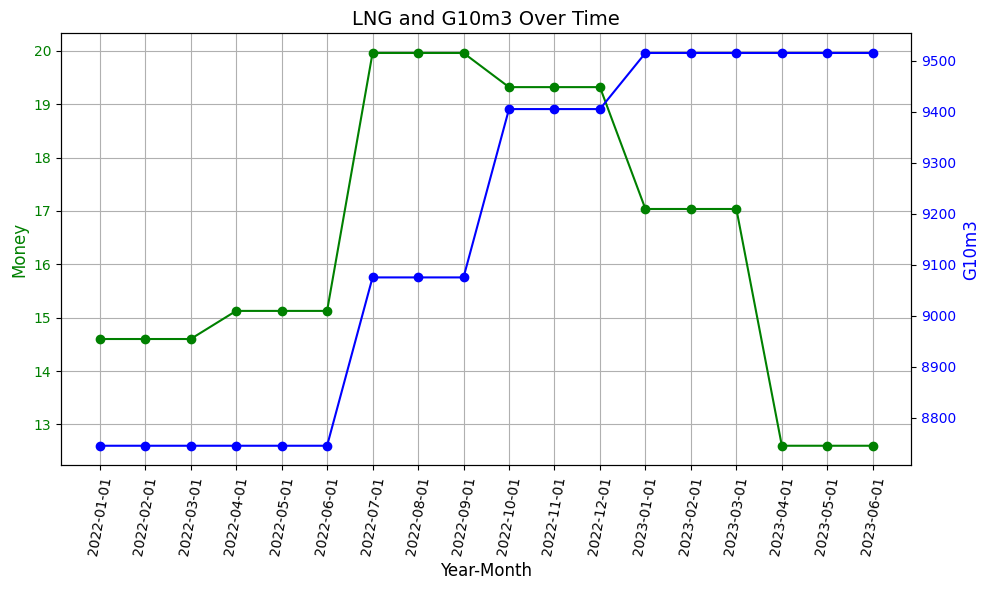

In [ ]:
# 3개월씩 평균내서 시각화
import pandas as pd

gas = pd.read_csv('/content/gaspal(전처리 후 데이터).csv')
gas = gas[(gas["yymm"] >= '2022-01-01') & (gas['yymm'] < '2023-07-01')]
gas = gas[['yymm', 'G10m3']]

# 시각화
import matplotlib.pyplot as plt

# 첫 번째 그래프: money[0]의 데이터를 기본 축에 표시
fig, ax1 = plt.subplots(figsize=(10,6))

# money[0] 시각화 (첫 번째 축)
ax1.plot(gas['yymm'], lng['일본단위가격(MMBtu당달러)'], marker='o', color='g', label='Money')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Money', color='g', fontsize=12)
ax1.tick_params(axis='y', labelcolor='g')
ax1.tick_params(axis='x', rotation=80)
ax1.grid(True)

# 두 번째 축을 생성 (트윈 축 사용)
ax2 = ax1.twinx()

# 두 번째 그래프: G10m3 시각화 (두 번째 축)
ax2.plot(gas['yymm'], gas['G10m3'], marker='o', linestyle='-', color='b', label='G10m3')
ax2.set_ylabel('G10m3', color='b', fontsize=12)
ax2.tick_params(axis='y', labelcolor='b')

# 타이틀 설정
plt.title('LNG and G10m3 Over Time', fontsize=14)

# 레이아웃 조정
fig.tight_layout()

# 그래프 표시
plt.show()


### CP가격과 고쿠라 판매소의 종량 요금간 관계 파악
- CP 가격(프로탄 기준): 계약 가격, 주로 사우디아라비아 국영 석유회사인 아람코(Aramco)가 매월 발표하는 국제 LPG 가격 기준
세계 LPG 시장에서 중요한 기준이 되며, LPG 거래 계약에서 기준으로 사용됨
주로 프로판과 부탄의 가격을 포함
원화로 변경할 때는 해당 월의 평균 환율을 사용

- LPG유통가격을 결정하는 요인
1) 사우디아라비아 아람코가 월 단위로 책정하는 LPG 국제가격(CP) 및 환율

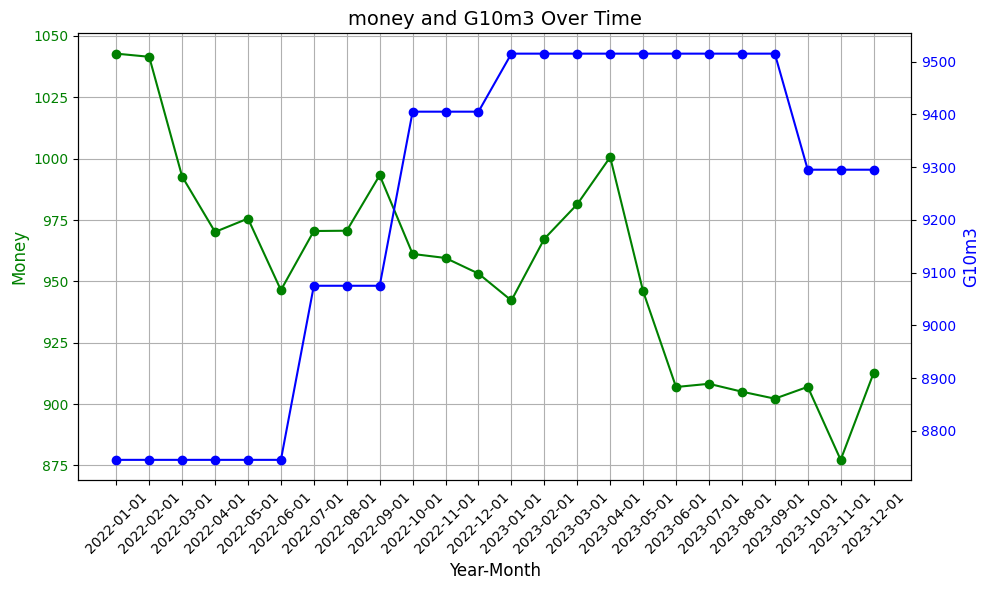

In [ ]:
import pandas as pd

gas = pd.read_csv('/content/gaspal(전처리 후 데이터).csv')
gas = gas[(gas["yymm"] >= '2022-01-01') & (gas['yymm'] < '2024-01-01')]
gas = gas[['yymm', 'G10m3']]


df_22 = pd.read_csv('/content/중소기업은행_환율변동 정보_20221231.csv', encoding='cp949')
df_23 = pd.read_csv('/content/중소기업은행_환율변동 정보_20231231.csv', encoding='cp949')
df_22 = df_22[df_22['통화'] == 'JPY'].reset_index(drop=False)
df_23 = df_23[df_23['통화'] == 'JPY'].reset_index(drop=False)

df_22 = df_22.iloc[:, 1:].T
df_23 = df_23.iloc[:, 1:].T

money = pd.concat([df_22, df_23])
money = money[money[0] != "JPY"]

# 시각화
import matplotlib.pyplot as plt

# 첫 번째 그래프: money[0]의 데이터를 기본 축에 표시
fig, ax1 = plt.subplots(figsize=(10,6))

# money[0] 시각화 (첫 번째 축)
ax1.plot(gas['yymm'], money[0], marker='o', color='g', label='Money')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Money', color='g', fontsize=12)
ax1.tick_params(axis='y', labelcolor='g')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# 두 번째 축을 생성 (트윈 축 사용)
ax2 = ax1.twinx()

# 두 번째 그래프: G10m3 시각화 (두 번째 축)
ax2.plot(gas['yymm'], gas['G10m3'], marker='o', linestyle='-', color='b', label='G10m3')
ax2.set_ylabel('G10m3', color='b', fontsize=12)
ax2.tick_params(axis='y', labelcolor='b')

# 타이틀 설정
plt.title('money and G10m3 Over Time', fontsize=14)

# 레이아웃 조정
fig.tight_layout()

# 그래프 표시
plt.show()


LPG 유통가격 결정 요인: CP 및 환율

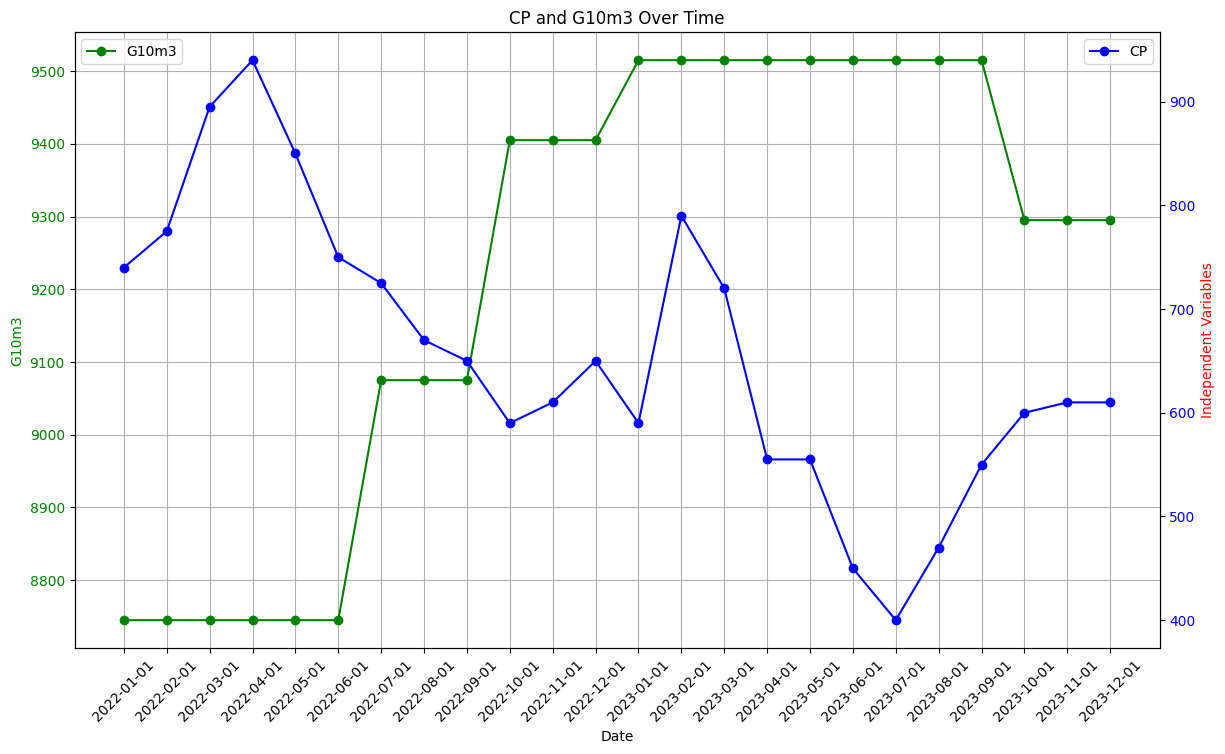

In [ ]:
gas = pd.read_csv('/content/gaspal(전처리 후 데이터).csv')
gas = gas[(gas["yymm"] >= '2022-01-01') & (gas['yymm'] < '2024-01-01')]
gas = gas[['yymm', 'G10m3', 'CP']]

df = gas.copy()

def plot_with_twin_axes(df, features, target):
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # 종속변수 시각화
    ax1.plot(df['yymm'], df[target], marker='o', color='g', label=target)
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'{target}', color='g')
    ax1.tick_params(axis='y', labelcolor='g')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True)

    # 트윈 축 생성 및 독립변수 시각화
    ax2 = ax1.twinx()
    for feature in features:
        ax2.plot(df['yymm'], df['CP'], marker='o', linestyle='-', color='b', label=feature)

    ax2.set_ylabel('Independent Variables', color='r')
    ax2.tick_params(axis='y', labelcolor='b')

    # 범례 및 제목 추가
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title('CP and G10m3 Over Time')
    plt.show()

features = ['CP']
plot_with_twin_axes(df, features, 'G10m3')


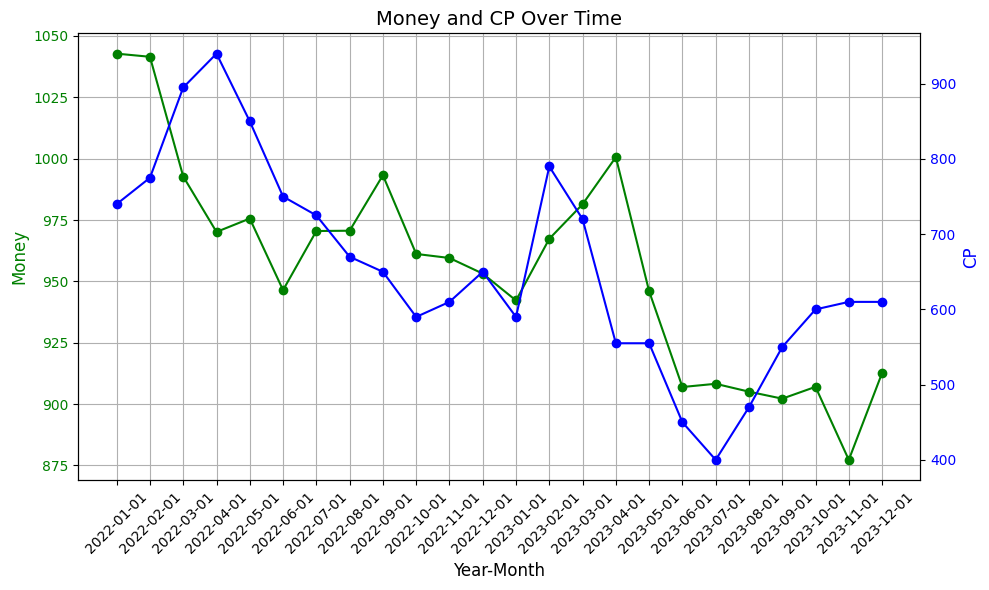

In [ ]:
import pandas as pd

gas = pd.read_csv('/content/gaspal(전처리 후 데이터).csv')
gas = gas[(gas["yymm"] >= '2022-01-01') & (gas['yymm'] < '2024-01-01')]
gas = gas[['yymm', 'CP']]


df_22 = pd.read_csv('/content/중소기업은행_환율변동 정보_20221231.csv', encoding='cp949')
df_23 = pd.read_csv('/content/중소기업은행_환율변동 정보_20231231.csv', encoding='cp949')
df_22 = df_22[df_22['통화'] == 'JPY'].reset_index(drop=False)
df_23 = df_23[df_23['통화'] == 'JPY'].reset_index(drop=False)

df_22 = df_22.iloc[:, 1:].T
df_23 = df_23.iloc[:, 1:].T

money = pd.concat([df_22, df_23])
money = money[money[0] != "JPY"]

gas = gas[gas['yymm'] >= '2022-01-01']

# 시각화
import matplotlib.pyplot as plt

# 첫 번째 그래프: money[0]의 데이터를 기본 축에 표시
fig, ax1 = plt.subplots(figsize=(10,6))

# money[0] 시각화 (첫 번째 축)
ax1.plot(gas['yymm'], money[0], marker='o', color='g', label='Money')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Money', color='g', fontsize=12)
ax1.tick_params(axis='y', labelcolor='g')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# 두 번째 축을 생성 (트윈 축 사용)
ax2 = ax1.twinx()

# 두 번째 그래프: G10m3 시각화 (두 번째 축)
ax2.plot(gas['yymm'], gas['CP'], marker='o', linestyle='-', color='b', label='CP')
ax2.set_ylabel('CP', color='b', fontsize=12)
ax2.tick_params(axis='y', labelcolor='b')

# 타이틀 설정
plt.title('Money and CP Over Time', fontsize=14)

# 레이아웃 조정
fig.tight_layout()

# 그래프 표시
plt.show()

# CP 가격은 시차를 고려하기 때문에 한 달 뒤에 반영됨
# CP 가격 결정 요인
# 1) LPG 국제가격(CP)
# 2) 환율
# 3) 시차 고려(LPG가 생산지에서 오기까지 1달 가량 소요 -> 다음 달 국내 공급가격에 반영됨)
# 4) 계절정 요인, 시장 상황

# 시각화 결과 -> 환율이 CP 가격 결정에 영향을 많이 미치는 것으로 파악

### 1m3당 종량요금의 단위요금(단가): 기준평균원료가격와 평균원료가격(3~5개월 전 LNG 및 LPG 평균수입가격)의 차이에 의해 결정함

In [ ]:
import pandas as pd

df = pd.read_csv('/content/gaspal(전처리 후 데이터).csv')
lng = pd.read_csv('/content/한국가스공사_아시아국 LNG 수입단가_20230630.csv', encoding='cp949')

lng = pd.read_csv('/content/한국가스공사_아시아국 LNG 수입단가_20230630.csv', encoding='cp949')
lng = lng[['연월일', '일본물량(Ton)', '일본수입대금(1000달러)', '일본단위가격(MMBtu당달러)']]

lng['group'] = (lng.index // 3)

# 그룹별 평균 계산 후, 동일 그룹 내 모든 행을 같은 평균 값으로 대체
lng['평균_일본단위가격(MMBtu당달러)'] = lng.groupby('group')['일본단위가격(MMBtu당달러)'].transform('mean')

# 결과 확인
lng.drop(columns='group')  # 그룹 컬럼은 제거하고 출력

,연월일,일본물량(Ton),일본수입대금(1000달러),일본단위가격(MMBtu당달러),평균_일본단위가격(MMBtu당달러)
0,2022-01-01,6786414,4847468.26,13.74,14.600000
1,2022-02-01,7108031,5863687.51,15.86,14.600000
2,2022-03-01,6505060,4802733.14,14.20,14.600000
3,2022-04-01,5574140,4421057.33,15.25,15.126667
4,2022-05-01,5760256,4670044.98,15.59,15.126667
5,2022-06-01,5804154,4388718.61,14.54,15.126667
6,2022-07-01,6163434,5726162.91,17.87,19.960000
7,2022-08-01,6274424,6477556.75,19.85,19.960000
8,2022-09-01,5324765,6135049.96,22.16,19.960000
9,2022-10-01,5086665,5409464.26,20.45,19.320000


In [ ]:
df = df[['yymm', 'G10m3', 'so_purchase_price']]

df_final = pd.merge(lng, df, left_on = '연월일', right_on = 'yymm', how='left')
df_final['diff'] = df_final['일본단위가격(MMBtu당달러)'] -  df_final['so_purchase_price']
df_final

,연월일,일본물량(Ton),일본수입대금(1000달러),일본단위가격(MMBtu당달러),group,평균_일본단위가격(MMBtu당달러),yymm,G10m3,so_purchase_price,diff
0,2022-01-01,6786414,4847468.26,13.74,0,14.600000,2022-01-01,8745.0,119.09,-105.35
1,2022-02-01,7108031,5863687.51,15.86,0,14.600000,2022-02-01,8745.0,121.26,-105.40
2,2022-03-01,6505060,4802733.14,14.20,0,14.600000,2022-03-01,8745.0,131.10,-116.90
3,2022-04-01,5574140,4421057.33,15.25,1,15.126667,2022-04-01,8745.0,149.15,-133.90
4,2022-05-01,5760256,4670044.98,15.59,1,15.126667,2022-05-01,8745.0,147.51,-131.92
5,2022-06-01,5804154,4388718.61,14.54,1,15.126667,2022-06-01,8745.0,144.88,-130.34
6,2022-07-01,6163434,5726162.91,17.87,2,19.960000,2022-07-01,9075.0,138.23,-120.36
7,2022-08-01,6274424,6477556.75,19.85,2,19.960000,2022-08-01,9075.0,132.56,-112.71
8,2022-09-01,5324765,6135049.96,22.16,2,19.960000,2022-09-01,9075.0,133.86,-111.70
9,2022-10-01,5086665,5409464.26,20.45,3,19.320000,2022-10-01,9405.0,127.88,-107.43


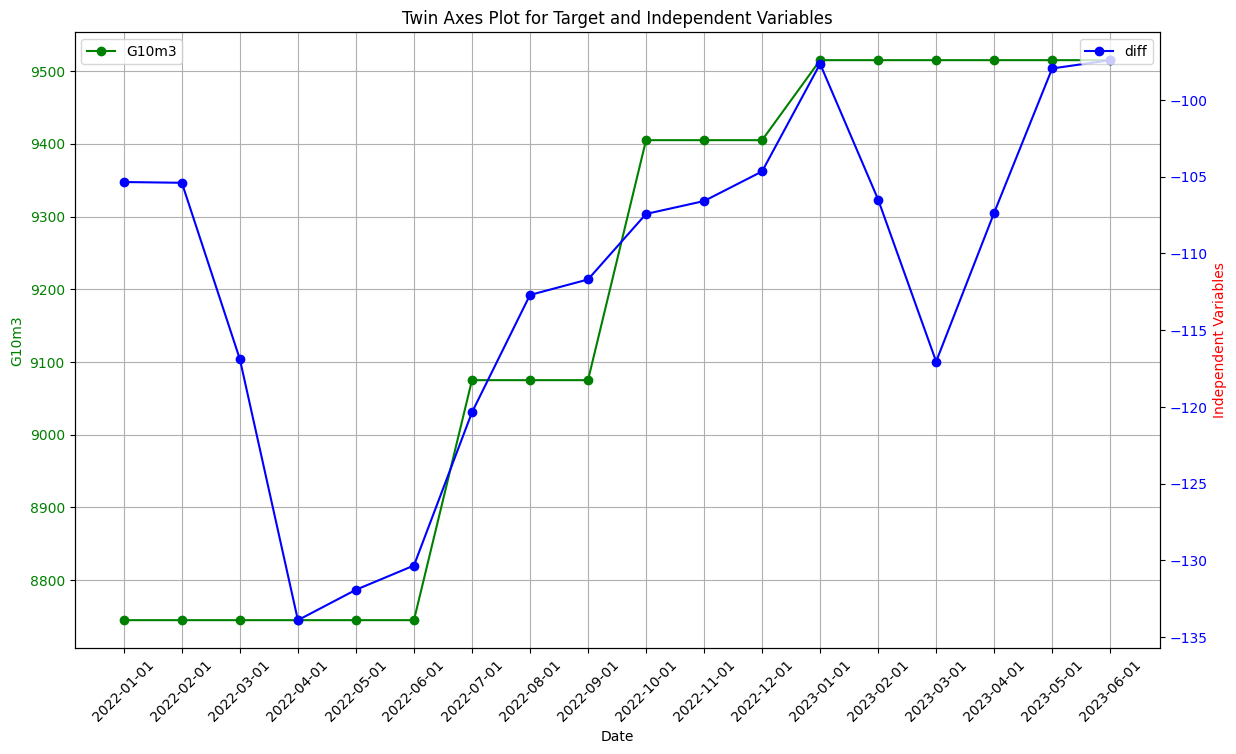

In [ ]:
df = df_final.copy()

def plot_with_twin_axes(df, features, target):
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # 종속변수 시각화
    ax1.plot(df['yymm'], df[target], marker='o', color='g', label=target)
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'{target}', color='g')
    ax1.tick_params(axis='y', labelcolor='g')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True)

    # 트윈 축 생성 및 독립변수 시각화
    ax2 = ax1.twinx()
    for feature in features:
        ax2.plot(df['yymm'].index, df[feature], marker='o', linestyle='-', color='b', label=feature)

    ax2.set_ylabel('Independent Variables', color='r')
    ax2.tick_params(axis='y', labelcolor='b')

    # 범례 및 제목 추가
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title('Twin Axes Plot for Target and Independent Variables')
    plt.show()

features = ['diff']
plot_with_twin_axes(df, features, 'G10m3')


<ipython-input-72-65336a578659>:53: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  fig.tight_layout()
<ipython-input-72-65336a578659>:53: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


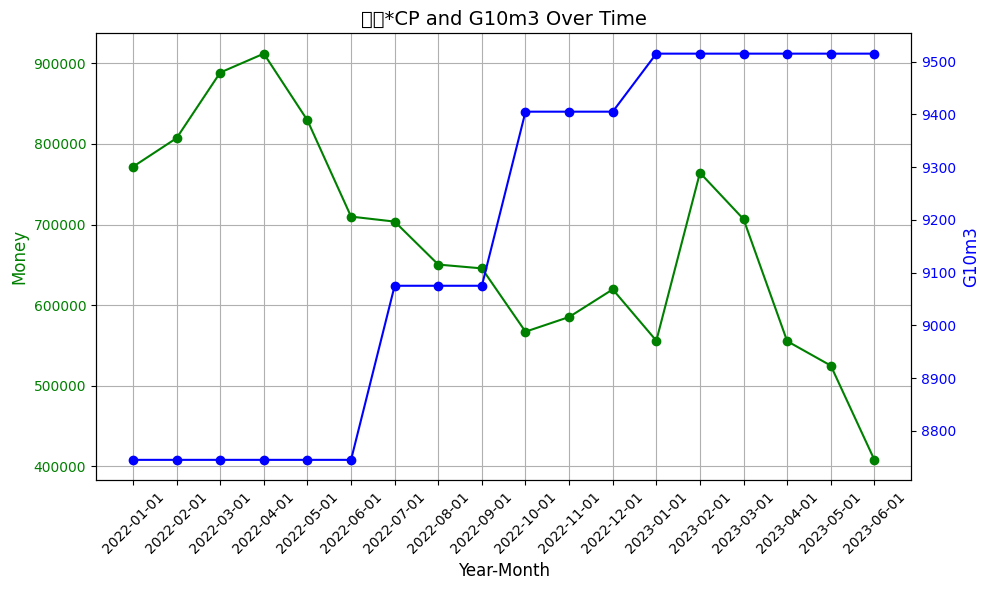

In [ ]:
# 환율 * CP가 LNG 대체 가능한지 여부 확인
# LNG 데이터는 추세 비슷하지만 데이터 존재 X
# 환율 데이터는 크롤링으로 수집 가능할듯?
import pandas as pd

gas = pd.read_csv('/content/gaspal(전처리 후 데이터).csv')
gas = gas[(gas["yymm"] >= '2022-01-01') & (gas['yymm'] < '2023-07-01')]
gas = gas[['yymm', 'G10m3', 'CP']]


df_22 = pd.read_csv('/content/중소기업은행_환율변동 정보_20221231.csv', encoding='cp949')
df_23 = pd.read_csv('/content/중소기업은행_환율변동 정보_20231231.csv', encoding='cp949')
df_22 = df_22[df_22['통화'] == 'JPY'].reset_index(drop=False)
df_23 = df_23[df_23['통화'] == 'JPY'].reset_index(drop=False)

df_22 = df_22.iloc[:, 1:].T.reset_index(drop=False)
df_23 = df_23.iloc[:, 1:].T.reset_index(drop=False)

money = pd.concat([df_22, df_23])
money = money[money[0] != "JPY"]

money['index'] = money['index'].astype(str).str[:-2] + '01'

CP = gas[['yymm', 'CP']]
money = pd.merge(money, CP, left_on = 'index', right_on='yymm', how='left')
money[0] = money[0].astype('float')
money['환율 * CP'] = money[0] * money['CP']
money = money.iloc[:18, :]

# 시각화
import matplotlib.pyplot as plt

# 첫 번째 그래프: money[0]의 데이터를 기본 축에 표시
fig, ax1 = plt.subplots(figsize=(10,6))

# money[0] 시각화 (첫 번째 축)
ax1.plot(gas['yymm'], money['환율 * CP'], marker='o', color='g', label='Money')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Money', color='g', fontsize=12)
ax1.tick_params(axis='y', labelcolor='g')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# 두 번째 축을 생성 (트윈 축 사용)
ax2 = ax1.twinx()

# 두 번째 그래프: G10m3 시각화 (두 번째 축)
ax2.plot(gas['yymm'], gas['G10m3'], marker='o', linestyle='-', color='b', label='G10m3')
ax2.set_ylabel('G10m3', color='b', fontsize=12)
ax2.tick_params(axis='y', labelcolor='b')

# 타이틀 설정
plt.title('환율*CP and G10m3 Over Time', fontsize=14)

# 레이아웃 조정
fig.tight_layout()

# 그래프 표시
plt.show()


### CPI_GAS(소비자 물가 지수_가스 요금)이 G10m3(고쿠라 판매소의 종량 요금)에 미치는 영향 분석

- CPI_GAS: 소비자 물가 지수_가스 요금
- G10m3: 고쿠라 판매소의 종량 요금, GP 요금 이력 내 10m3 요금(세금포함), GP요금이력서에서  제공되는 10m3(단위 부피당)단위로 부과되는 요금

- 물가상승: 일본 전역에서 인플레이션 증가 -> 가스 요금에 영향을 미침


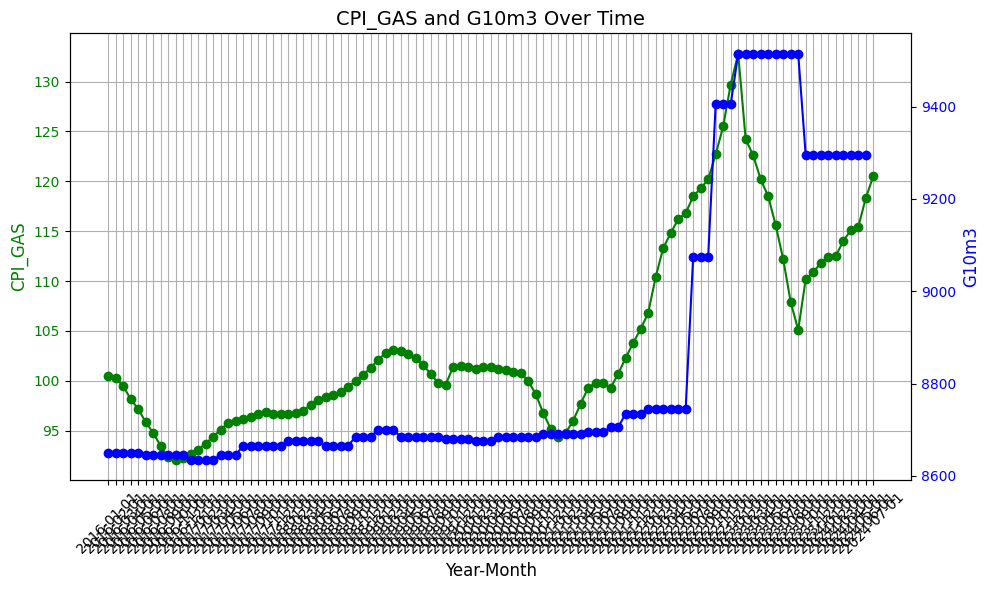

In [ ]:
import pandas as pd

gas = pd.read_csv('/content/gaspal(전처리 후 데이터).csv')
gas = gas[['yymm', 'G10m3', 'CPI_GAS']]

# 시각화
import matplotlib.pyplot as plt

# 첫 번째 그래프: money[0]의 데이터를 기본 축에 표시
fig, ax1 = plt.subplots(figsize=(10,6))

# money[0] 시각화 (첫 번째 축)
ax1.plot(gas['yymm'], gas['CPI_GAS'], marker='o', color='g', label='Money')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('CPI_GAS', color='g', fontsize=12)
ax1.tick_params(axis='y', labelcolor='g')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# 두 번째 축을 생성 (트윈 축 사용)
ax2 = ax1.twinx()

# 두 번째 그래프: G10m3 시각화 (두 번째 축)
ax2.plot(gas['yymm'], gas['G10m3'], marker='o', linestyle='-', color='b', label='G10m3')
ax2.set_ylabel('G10m3', color='b', fontsize=12)
ax2.tick_params(axis='y', labelcolor='b')

# 타이틀 설정
plt.title('CPI_GAS and G10m3 Over Time', fontsize=14)

# 레이아웃 조정
fig.tight_layout()

# 그래프 표시
plt.show()

# CPI_GAS가 상승함에 따라 G10m3의 값도 상승하는 것으로 파악 가능

<ipython-input-96-83b6c514e643>:36: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.tight_layout()
<ipython-input-96-83b6c514e643>:36: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


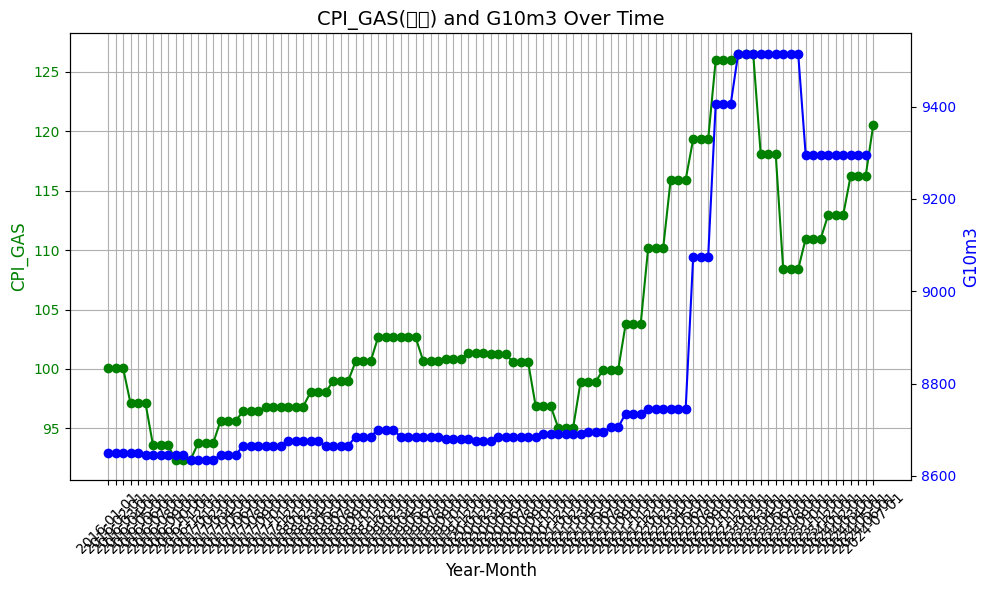

In [ ]:
import pandas as pd

gas = pd.read_csv('/content/gaspal(전처리 후 데이터).csv')
gas = gas[['yymm', 'G10m3', 'CPI_GAS']]

gas['group'] = (gas.index // 3)
gas['CPI_GAS Mean'] = gas.groupby('group')['CPI_GAS'].transform('mean')
gas.drop(columns='group')

# 시각화
import matplotlib.pyplot as plt

# 첫 번째 그래프: money[0]의 데이터를 기본 축에 표시
fig, ax1 = plt.subplots(figsize=(10,6))

# money[0] 시각화 (첫 번째 축)
ax1.plot(gas['yymm'], gas['CPI_GAS Mean'], marker='o', color='g', label='Money')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('CPI_GAS', color='g', fontsize=12)
ax1.tick_params(axis='y', labelcolor='g')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# 두 번째 축을 생성 (트윈 축 사용)
ax2 = ax1.twinx()

# 두 번째 그래프: G10m3 시각화 (두 번째 축)
ax2.plot(gas['yymm'], gas['G10m3'], marker='o', linestyle='-', color='b', label='G10m3')
ax2.set_ylabel('G10m3', color='b', fontsize=12)
ax2.tick_params(axis='y', labelcolor='b')

# 타이틀 설정
plt.title('CPI_GAS(평균) and G10m3 Over Time', fontsize=14)

# 레이아웃 조정
fig.tight_layout()

# 그래프 표시
plt.show()

# CPI_GAS가 상승함에 따라 G10m3의 값도 상승하는 것으로 파악 가능

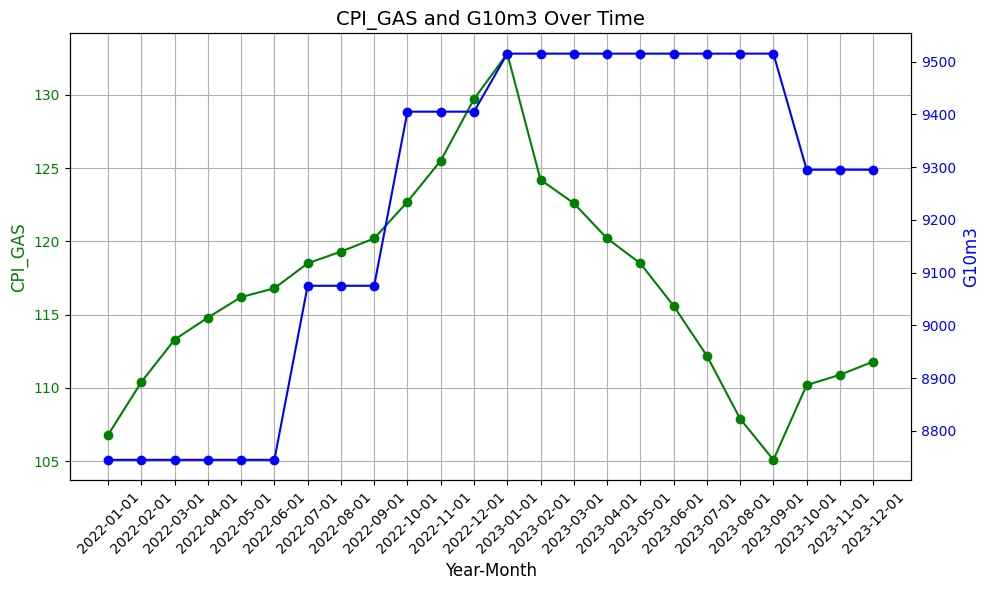

In [ ]:
import pandas as pd

gas = pd.read_csv('/content/gaspal(전처리 후 데이터).csv')
gas = gas[(gas["yymm"] >= '2022-01-01') & (gas['yymm'] < '2024-01-01')]
gas = gas[['yymm', 'G10m3', 'CPI_GAS']]

# 시각화
import matplotlib.pyplot as plt

# 첫 번째 그래프: money[0]의 데이터를 기본 축에 표시
fig, ax1 = plt.subplots(figsize=(10,6))

# money[0] 시각화 (첫 번째 축)
ax1.plot(gas['yymm'], gas['CPI_GAS'], marker='o', color='g', label='Money')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('CPI_GAS', color='g', fontsize=12)
ax1.tick_params(axis='y', labelcolor='g')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# 두 번째 축을 생성 (트윈 축 사용)
ax2 = ax1.twinx()

# 두 번째 그래프: G10m3 시각화 (두 번째 축)
ax2.plot(gas['yymm'], gas['G10m3'], marker='o', linestyle='-', color='b', label='G10m3')
ax2.set_ylabel('G10m3', color='b', fontsize=12)
ax2.tick_params(axis='y', labelcolor='b')

# 타이틀 설정
plt.title('CPI_GAS and G10m3 Over Time', fontsize=14)

# 레이아웃 조정
fig.tight_layout()

# 그래프 표시
plt.show()


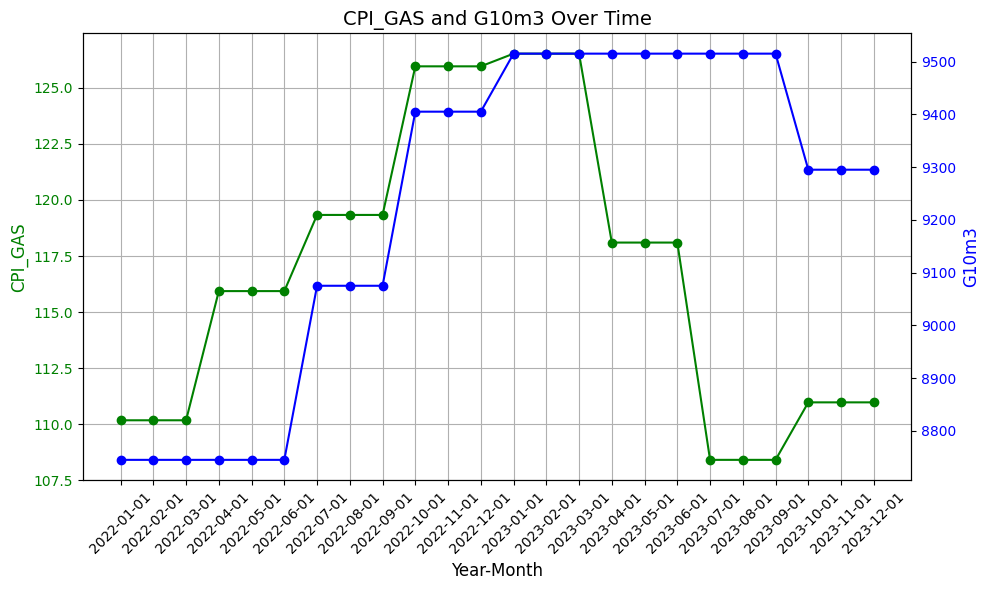

In [ ]:
gas = pd.read_csv('/content/gaspal(전처리 후 데이터).csv')
gas = gas[(gas["yymm"] >= '2022-01-01') & (gas['yymm'] < '2024-01-01')]
gas = gas[['yymm', 'G10m3', 'CPI_GAS']]

gas['group'] = (gas.index // 3)
gas['CPI_GAS Mean'] = gas.groupby('group')['CPI_GAS'].transform('mean')
gas.drop(columns='group')

# 첫 번째 그래프: money[0]의 데이터를 기본 축에 표시
fig, ax1 = plt.subplots(figsize=(10,6))

# money[0] 시각화 (첫 번째 축)
ax1.plot(gas['yymm'], gas['CPI_GAS Mean'], marker='o', color='g', label='Money')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('CPI_GAS', color='g', fontsize=12)
ax1.tick_params(axis='y', labelcolor='g')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# 두 번째 축을 생성 (트윈 축 사용)
ax2 = ax1.twinx()

# 두 번째 그래프: G10m3 시각화 (두 번째 축)
ax2.plot(gas['yymm'], gas['G10m3'], marker='o', linestyle='-', color='b', label='G10m3')
ax2.set_ylabel('G10m3', color='b', fontsize=12)
ax2.tick_params(axis='y', labelcolor='b')

# 타이틀 설정
plt.title('CPI_GAS and G10m3 Over Time', fontsize=14)

# 레이아웃 조정
fig.tight_layout()

# 그래프 표시
plt.show()

# CPI_GAS와 추세 유사한 것을 확인 가능

### 소비자 물가 지수(CPI_GAS)와 LNG 간의 추세 확인
- CPI_GAS와 G10m3의 추세 유사하다고 파악
- LNG와 G10m3의 추세 유사하다고 파악
-> 둘 간에도 추세 비슷한지 파악해보기 위함

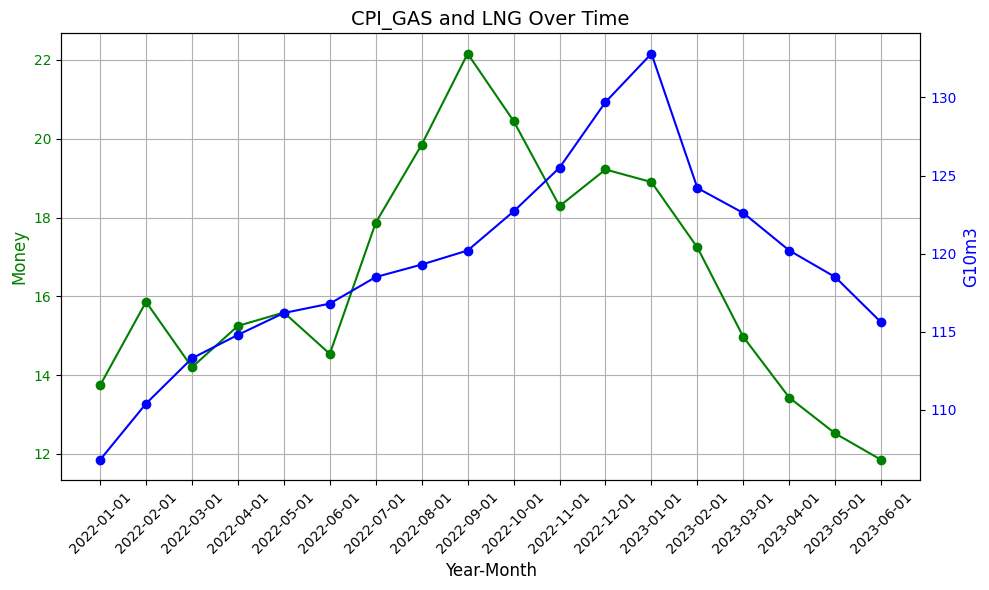

In [ ]:
import pandas as pd

gas = pd.read_csv('/content/gaspal(전처리 후 데이터).csv')
gas = gas[(gas["yymm"] >= '2022-01-01') & (gas['yymm'] < '2023-07-01')]
gas = gas[['yymm', 'G10m3', 'WTI']]

lng = pd.read_csv('/content/한국가스공사_아시아국 LNG 수입단가_20230630.csv', encoding='cp949')
lng = lng[['연월일', '일본물량(Ton)', '일본수입대금(1000달러)', '일본단위가격(MMBtu당달러)']]

# 시각화
import matplotlib.pyplot as plt

# 첫 번째 그래프: money[0]의 데이터를 기본 축에 표시
fig, ax1 = plt.subplots(figsize=(10,6))

# money[0] 시각화 (첫 번째 축)
ax1.plot(gas['yymm'], lng['일본단위가격(MMBtu당달러)'], marker='o', color='g', label='Money')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Money', color='g', fontsize=12)
ax1.tick_params(axis='y', labelcolor='g')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# 두 번째 축을 생성 (트윈 축 사용)
ax2 = ax1.twinx()

# 두 번째 그래프: G10m3 시각화 (두 번째 축)
ax2.plot(gas['yymm'], gas['CPI_GAS'], marker='o', linestyle='-', color='b', label='G10m3')
ax2.set_ylabel('G10m3', color='b', fontsize=12)
ax2.tick_params(axis='y', labelcolor='b')

# 타이틀 설정
plt.title('CPI_GAS and LNG Over Time', fontsize=14)

# 레이아웃 조정
fig.tight_layout()

# 그래프 표시
plt.show()


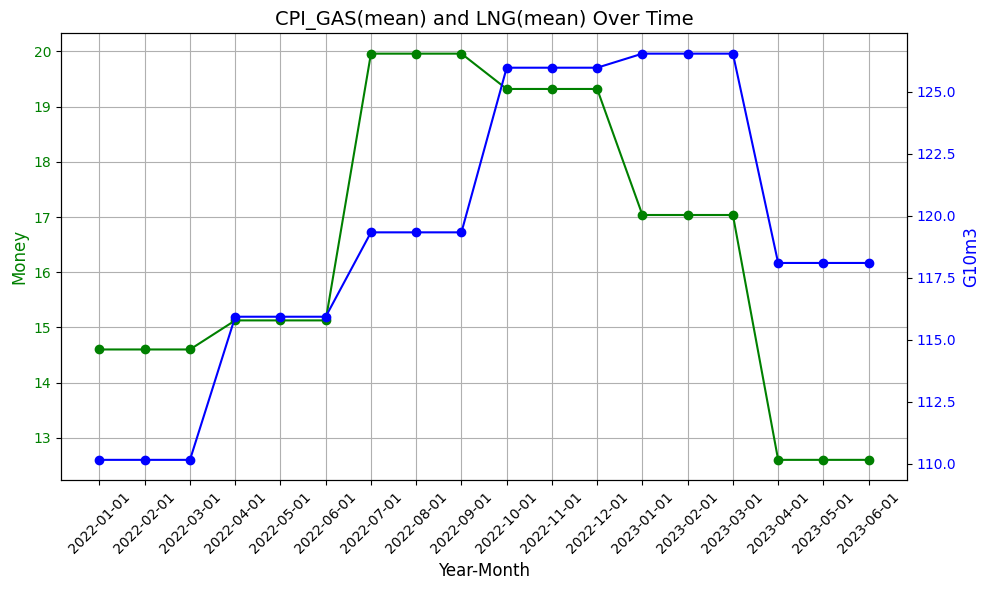

In [ ]:
import pandas as pd

gas = pd.read_csv('/content/gaspal(전처리 후 데이터).csv')
gas = gas[(gas["yymm"] >= '2022-01-01') & (gas['yymm'] < '2023-07-01')]
gas = gas[['yymm', 'G10m3', 'CPI_GAS']]

gas['group'] = (gas.index // 3)
gas['CPI_GAS Mean'] = gas.groupby('group')['CPI_GAS'].transform('mean')
gas.drop(columns='group')

lng = pd.read_csv('/content/한국가스공사_아시아국 LNG 수입단가_20230630.csv', encoding='cp949')
lng = lng[['연월일', '일본물량(Ton)', '일본수입대금(1000달러)', '일본단위가격(MMBtu당달러)']]

lng['group'] = (lng.index // 3)
lng['LNG Mean'] = lng.groupby('group')['일본단위가격(MMBtu당달러)'].transform('mean')
lng.drop(columns='group')

# 시각화
import matplotlib.pyplot as plt

# 첫 번째 그래프: money[0]의 데이터를 기본 축에 표시
fig, ax1 = plt.subplots(figsize=(10,6))

# money[0] 시각화 (첫 번째 축)
ax1.plot(gas['yymm'], lng['LNG Mean'], marker='o', color='g', label='Money')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Money', color='g', fontsize=12)
ax1.tick_params(axis='y', labelcolor='g')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# 두 번째 축을 생성 (트윈 축 사용)
ax2 = ax1.twinx()

# 두 번째 그래프: G10m3 시각화 (두 번째 축)
ax2.plot(gas['yymm'], gas['CPI_GAS Mean'], marker='o', linestyle='-', color='b', label='G10m3')
ax2.set_ylabel('G10m3', color='b', fontsize=12)
ax2.tick_params(axis='y', labelcolor='b')

# 타이틀 설정
plt.title('CPI_GAS(mean) and LNG(mean) Over Time', fontsize=14)

# 레이아웃 조정
fig.tight_layout()

# 그래프 표시
plt.show()
